In [1]:
import pandas as pd
import numpy as np
import mlflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, RocCurveDisplay,confusion_matrix
from sklearn.model_selection import KFold
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.ensemble import RandomForestClassifier
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
!pip install skl2onnx

In [56]:
data = pd.read_csv("data/Student Mental health.csv")
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [9]:
data["Your current year of Study"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [4]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [6]:
data.shape

(101, 11)

In [7]:
data.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [8]:
data.isnull().values.any()

True

In [9]:
data.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [57]:
data = data.dropna(how='any',axis=0) 
data.shape

(100, 11)

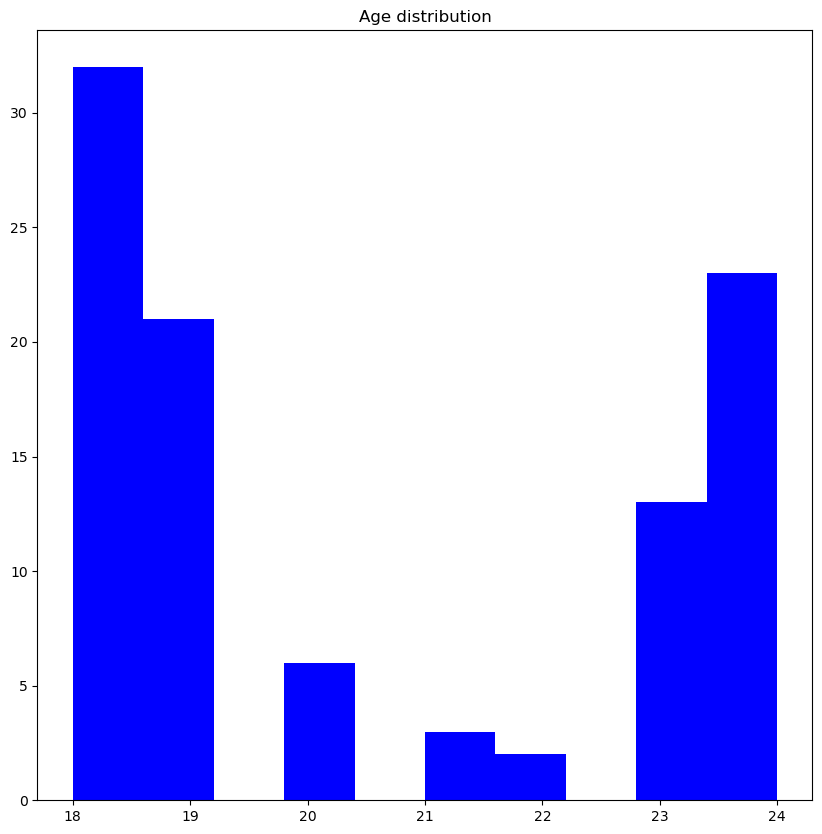

In [25]:
plt.figure(figsize=(10,10))
plt.hist(data['Age'],color='b')
plt.title("Age distribution");

In [58]:
data.rename(columns = {'Choose your gender':'Choose_your_gender',
                     'What is your course?':'What_is_your_course', 
                     'Your current year of Study':'Your_current_year_of_Study',
                     'What is your CGPA?':'What_is_your_CGPA', 
                     'Marital status':'Marital_status', 
                     'Do you have Depression?':'Depression', 
                     'Do you have Anxiety?':'Do_you_have_Anxiety',
                     'Do you have Panic attack?':'Do_you_have_Panic_attack', 
                     'Did you seek any specialist for a treatment?':'Did_you_seek_any_specialist_for_a_treatment'}, inplace = True)
data.head()

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [29]:
data["What_is_your_course"].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [59]:
data["Depression"].replace({"Yes": 1, "No": 0}, inplace=True)
data["Marital_status"].replace({"Yes": 1, "No": 0}, inplace=True)
data["Do_you_have_Anxiety"].replace({"Yes": 1, "No": 0}, inplace=True)
data["Do_you_have_Panic_attack"].replace({"Yes": 1, "No": 0}, inplace=True)
data["Did_you_seek_any_specialist_for_a_treatment"].replace({"Yes": 1, "No": 0}, inplace=True)
data["Choose_your_gender"].replace({"Male": 1, "Female": 0}, inplace=True)
data["What_is_your_course"].replace({
                                     "Islamic education": "Islamic Education",
                                     "Law": "Laws",
                                     "Pendidikan islam": "Pendidikan Islam",
                                     "Pendidikan Islam ": "Pendidikan Islam",
                                     "psychology": "Psychology",
                                     "koe": "KOE",
                                     "Koe": "KOE",
                                     "Kirkhs": "KIRKHS",
                                     "Benl": "BENL",
                                     "Nursing ": "Diploma Nursing",
                                     "engin": "Engineering",
                                     "Engine": "Engineering"}, inplace=True)

data["What_is_your_CGPA"].replace({"3.50 - 4.00 ": "3.50 - 4.00"}, inplace=True)

data["Your_current_year_of_Study"].replace({
                                     "Year 1": 1,
                                     "year 1": 1,
                                     "year 2": 2,
                                     "Year 2": 2,
                                     "year 3": 3,
                                     "Year 3": 3,
                                     "year 4": 4,
                                     "Year 4": 4,}, inplace=True)


In [60]:
data["What_is_your_CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [61]:
data.head()

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,8/7/2020 12:02,0,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,Islamic Education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [62]:
le = LabelEncoder()
data['course_encoded'] = le.fit_transform(data['What_is_your_course'])

In [63]:
for label, encoding in zip(le.classes_, le.transform(le.classes_)):
    print(f"Label: {label}, Encodage: {encoding}")

Label: ALA, Encodage: 0
Label: Accounting , Encodage: 1
Label: BCS, Encodage: 2
Label: BENL, Encodage: 3
Label: BIT, Encodage: 4
Label: Banking Studies, Encodage: 5
Label: Biomedical science, Encodage: 6
Label: Biotechnology, Encodage: 7
Label: Business Administration, Encodage: 8
Label: CTS, Encodage: 9
Label: Communication , Encodage: 10
Label: DIPLOMA TESL, Encodage: 11
Label: Diploma Nursing, Encodage: 12
Label: ENM, Encodage: 13
Label: Econs, Encodage: 14
Label: Engineering, Encodage: 15
Label: Fiqh, Encodage: 16
Label: Fiqh fatwa , Encodage: 17
Label: Human Resources, Encodage: 18
Label: Human Sciences , Encodage: 19
Label: IT, Encodage: 20
Label: Irkhs, Encodage: 21
Label: Islamic Education, Encodage: 22
Label: KENMS, Encodage: 23
Label: KIRKHS, Encodage: 24
Label: KOE, Encodage: 25
Label: Kop, Encodage: 26
Label: Laws, Encodage: 27
Label: MHSC, Encodage: 28
Label: Malcom, Encodage: 29
Label: Marine science, Encodage: 30
Label: Mathemathics, Encodage: 31
Label: Pendidikan Islam,

In [64]:
le2 = LabelEncoder()
data['CGPA_encoded'] = le2.fit_transform(data['What_is_your_CGPA'])

In [65]:
for label, encoding in zip(le2.classes_, le2.transform(le2.classes_)):
    print(f"Label: {label}, Encodage: {encoding}")

Label: 0 - 1.99, Encodage: 0
Label: 2.00 - 2.49, Encodage: 1
Label: 2.50 - 2.99, Encodage: 2
Label: 3.00 - 3.49, Encodage: 3
Label: 3.50 - 4.00, Encodage: 4


In [66]:
data["Depression"].value_counts()

0    65
1    35
Name: Depression, dtype: int64

In [67]:
data.drop(columns=["Timestamp","What_is_your_course","What_is_your_CGPA"],inplace=True)

In [68]:
data.head()

,Choose_your_gender,Age,Your_current_year_of_Study,Marital_status,Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment,course_encoded,CGPA_encoded
0,0,18.0,1,0,1,0,1,0,15,3
1,1,21.0,2,0,0,1,0,0,22,3
2,1,19.0,1,0,1,1,1,0,4,3
3,0,22.0,3,1,1,0,0,0,27,3
4,1,23.0,4,0,0,0,0,0,31,3


In [69]:
data.shape

(100, 10)

In [120]:
X = data.drop(columns=["Depression"])
y = data.Depression

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# # Model training 

In [73]:
def evaluate(sk_model, x_test, y_test):
    eval_acc = sk_model.score(x_test, y_test)
    preds = sk_model.predict(x_test)
    auc_score = roc_auc_score(y_test, preds)
    mlflow.log_metric("eval_acc", eval_acc) 
    mlflow.log_metric("auc_score", auc_score)
    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")
    plt.clf()
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.savefig("sklearn_conf_matrix.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")

## LogisticRegression

Train Accuracy: 86.250%
Auc Score: 77.778%
Eval Accuracy: 80.000%
Model run:  d4fc196400544e1f897c3bbdc9c3aee7


/home/ewins/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


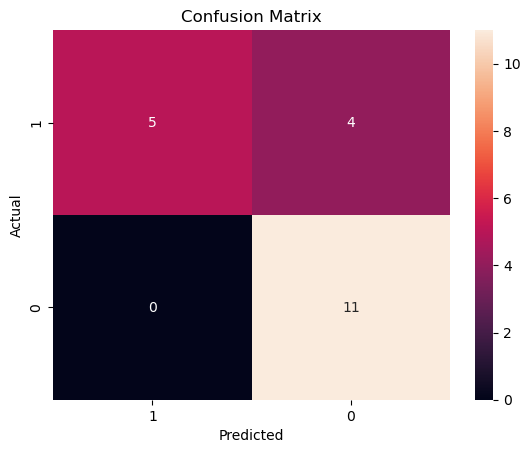

In [74]:
sk_model = LogisticRegression(random_state=None)
mlflow.set_experiment("assignement_exp")
with mlflow.start_run():
    params = {
    "max_iter": 1,
    "penalty" : 'L1',
    "solver": 'liblinear',
    }
    mlflow.log_params(params)
    sk_model = sk_model.fit(X_train, y_train)
    train_acc = sk_model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc)  
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, X_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

## SVC

Train Accuracy: 87.500%
Auc Score: 73.232%
Eval Accuracy: 75.000%
Model run:  315c28fd4b2f49459f43d1a7934c46f0


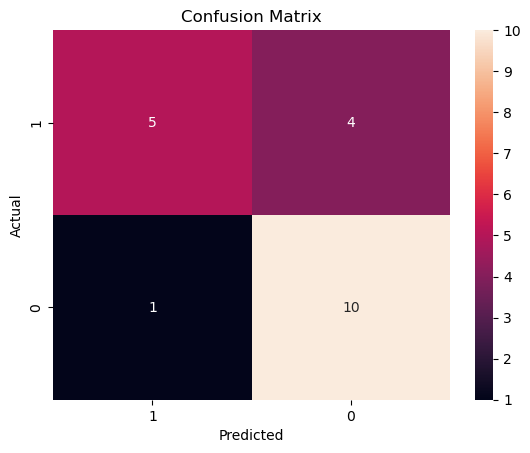

In [75]:
sk_model = SVC(random_state=None)
mlflow.set_experiment("assignement_exp")
with mlflow.start_run():
    params = {
    "max_iter": 600,
    "C": 1,
    "kernel" : 'poly', 
    }
    mlflow.log_params(params)
    sk_model = sk_model.fit(X_train, y_train)
    train_acc = sk_model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc)
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, X_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

## RandomForest

Train Accuracy: 100.000%
Auc Score: 73.232%
Eval Accuracy: 75.000%
Model run:  334e46c83c7a45c98b5b5ed8f9092d7d


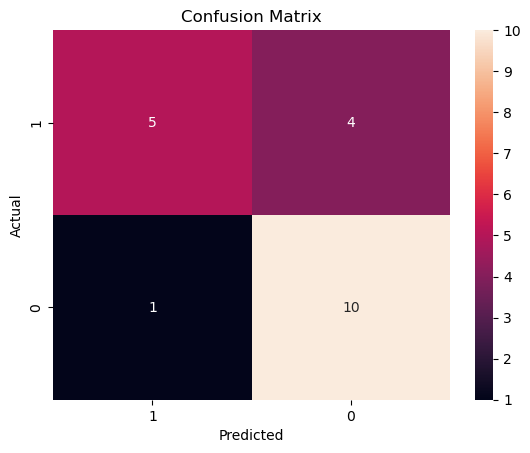

In [76]:
sk_model = RandomForestClassifier(random_state=None)
mlflow.set_experiment("assignement_exp")
with mlflow.start_run():
    sk_model = sk_model.fit(X_train, y_train)
    train_acc = sk_model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc)
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, X_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [77]:
lr = mlflow.sklearn.load_model("runs:/d4fc196400544e1f897c3bbdc9c3aee7/log_reg_model")

In [78]:
initial_type = [('float_input', FloatTensorType([None, 9]))]
onx = convert_sklearn(lr, initial_types=initial_type)
with open("artifacts/lr.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [79]:
import pickle
with open('artifacts/scaler.pkl', 'wb') as scaler_pkl:
    pickle.dump(sc, scaler_pkl)

## Load files

In [80]:
with open('artifacts/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [81]:
import onnxruntime as rt
import numpy
sess = rt.InferenceSession("artifacts/lr.onnx")

In [82]:
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

In [83]:
data.head()

,Choose_your_gender,Age,Your_current_year_of_Study,Marital_status,Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment,course_encoded,CGPA_encoded
0,0,18.0,1,0,1,0,1,0,15,3
1,1,21.0,2,0,0,1,0,0,22,3
2,1,19.0,1,0,1,1,1,0,4,3
3,0,22.0,3,1,1,0,0,0,27,3
4,1,23.0,4,0,0,0,0,0,31,3


In [133]:
test_data = np.array([1,22,3,1,1,1,1,15,0])

In [134]:
test_data = scaler.fit_transform(test_data.reshape(1, 9))

In [135]:
pred_onx = sess.run([label_name], {input_name: test_data.astype(numpy.float32)})[0]

In [136]:
pred_onx[0]

0